In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X = np.arange(20) # 20 data points, examples?
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [13]:
# Assume a fixed line with theta0 = 2 and theta1 = 3
theta = np.array([2,3])

# Generate data - which ll have some noise, we need 20 noise samples coming from a standard normal dist.

standard_normal_dist = np.random.randn(20)

sigma = 3
u = 0
noise = sigma * standard_normal_dist + u
noise


array([ 3.11489011,  1.58439281, -0.53787478,  5.32614305, -2.6876555 ,
        1.02975134, -7.73464682, -3.72802007, -3.96184546, -4.55649753,
        4.45371404, -3.47478827,  1.57949605, -4.24872392,  3.65398132,
       -2.50578742, -1.65358266, -3.44653687, -2.73683373,  3.68753728])

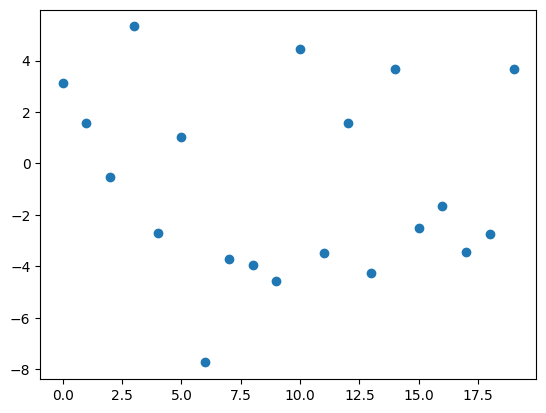

In [14]:
Y = noise # if slope and bias are 0 - which means - be any value of x, Y is only dependent on noise with zero mean and given std
plt.scatter(X, Y)
plt.show()

In [15]:
Y_ideal = theta[1] * X + theta[0]
Y_real = theta[1] * X + theta[0] + noise


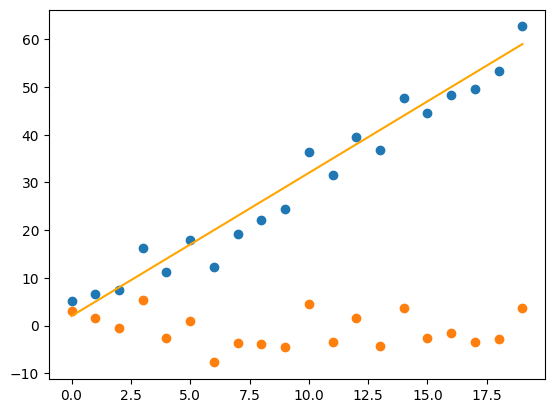

In [17]:
plt.plot(X, Y_ideal, color='orange') # orange line is a perfect fit
plt.scatter(X, Y_real) # due to some noise, points lie about the line
plt.scatter(X, noise)

plt.show()

# New mean of noise = theta[1] * X + theta[0] -> ProbDistFn of noise shifts by this new mean 
# -> higher the value of a specific x example/data point, more is the shifting of that specific noise point

In [19]:
# Maximum Likelihood Estimate
# Which is the line that maximize the probability of generating given kind of data D (X, Y points) - (such that data points properly scattered *across* *about* *all around* the line)
# Dataset = X,Y = D
# Find that optimal value of theta that maximize Probability Distribution Fn of data D parameterized by theta
# theta_* = argmax_theta P[D;theta] # ; means "parameterized by"
#
# Compute theta that produces max PDF.
# 
# In mathematics and computer science,
# "max" refers to the maximum value of a function or a set of numbers, while "arg max" refers to the argument (input) at which the maximum value is achieved.
# In other words, "max" gives you the actual maximum value, while "arg max" gives you the input that produces that maximum value.
#
# 
# Data representation = (Y_ex1, Y_ex2,,,,, Y_example_m | X_ex1, X_ex2,,,,, X_example_m) # Y computed given values of X
# P(Y_ex1, Y_ex2,,,,, Y_example_m | X_ex1, X_ex2,,,,, X_example_m ; theta) # | means "given"
# NOTE: Assumed Data is IID - Identially and independetly generated, independent means - Y_ex1 ONLY depends on X_ex1,  Y_ex2 ONLY depends on X_ex2, Y_ex3 ONLY depends on X_ex3
# WHich means - This Prob dist fn is PRODUCT of m probability density fns - where each PDF = P(Y_example_i|X_example_i; theta)
# we already know that Y_example_i is coming from a Normal Distribution whose mean is (theta.T * X_example_i) and std as sigma
# P(Y_ex1, Y_ex2,,,,, Y_example_m | X_ex1, X_ex2,,,,, X_example_m ; theta) = Product(i=1 to m) of PDF_example_i where PDF_example_i is normal dist as mentioned above.
# THE MORE predicted Y CLOSER TO THE LINE, THE MORE PROB OF HAVING THAT DATAPOINT in the dataset D(Y,X)
